In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [3]:
#Obtener equipos y los ids con los que están registrados en la página de FIFA
url_equipos="https://api.fifa.com/api/v3/competitions/teams/285026?language=es"

In [4]:
#btener JSON de la página
r_equipos=requests.get(url_equipos)
equipos=r_equipos.json()

In [5]:
#Ids y selecciones
ids=[]
selecciones=[]

for i in range (0,32):
    ids.append(equipos["Results"][i]["IdTeam"])
    selecciones.append(equipos["Results"][i]["ShortClubName"])


In [6]:
#Poner en un dataframe
df=pd.DataFrame({"id":ids,"seleccion":selecciones})
df

,id,seleccion
0,1884881,Argentina
1,1882891,Australia
2,1882881,Brazil
3,1883718,Canada
4,1882892,China PR
5,1885035,Colombia
6,1884880,Costa Rica
7,1883719,Denmark
8,1883720,England
9,1884761,France


### Obtener datos de las jugadoras

In [7]:
#Parámetros básicos para la url
url_basica="https://api.fifa.com/api/v3/teams/"
fin="/squad?idCompetition=103&idSeason=285026&language=es"

In [8]:
# Construir la url para cada equipo
data=[]
for ids in df["id"]:
    url = url_basica + str(ids) + fin
    r = requests.get(url)
    if r.status_code == 200:  # Checar que la respuesta sea exitosa
        data.append(r.json())
    else:
        print(f"Falló la respuesta del {ids} Código {r.status_code}")

# Obtener datos de las jugadoras
nombres=[]
seleccion=[]
posicion=[]
altura=[]
for team_data in data:
    for i in range(0,len(team_data["Players"])):
        nombres.append(team_data["Players"][i]["PlayerName"][0]["Description"])
        seleccion.append(team_data["TeamName"][0]["Description"])
        posicion.append(team_data["Players"][i]["Position"])
        altura.append(team_data["Players"][i]["Height"])


In [9]:
#Dataframe
jugadoras=pd.DataFrame({"nombre":nombres,"seleccion":seleccion,"posicion":posicion,"altura":altura})
jugadoras

,nombre,seleccion,posicion,altura
0,Vanina CORREA,Argentina,0,180.0
1,Adriana María Sachs,Argentina,1,163.0
2,Eliana STABILE,Argentina,1,167.0
3,Julieta CRUZ,Argentina,1,160.0
4,Vanesa Santana,Argentina,2,157.0
...,...,...,...,...
731,Siomala Mapepa,Zambia,3,163.0
732,Hellen CHANDA,Zambia,3,165.0
733,Avell CHITUNDU,Zambia,2,140.0
734,Esther BANDA,Zambia,1,156.0


In [10]:
#Filtrar si es argentina
jugadoras_arg=jugadoras[jugadoras["seleccion"]=="Argentina"]
jugadoras_arg.head(30)

,nombre,seleccion,posicion,altura
0,Vanina CORREA,Argentina,0,180.0
1,Adriana María Sachs,Argentina,1,163.0
2,Eliana STABILE,Argentina,1,167.0
3,Julieta CRUZ,Argentina,1,160.0
4,Vanesa Santana,Argentina,2,157.0
5,Aldana Cometti,Argentina,1,168.0
6,Romina NUNEZ,Argentina,2,158.0
7,Daiana FALFAN,Argentina,2,165.0
8,Paulina GRAMAGLIA,Argentina,3,175.0
9,Dalila IPPOLITO,Argentina,2,157.0


### Porteras del torneo

In [11]:
#Filtrar por posición si es cero
porteras=jugadoras[jugadoras["posicion"]==0]
porteras

,nombre,seleccion,posicion,altura
0,Vanina CORREA,Argentina,0,180.0
11,Lara ESPONDA,Argentina,0,170.0
22,Abigail CHAVES,Argentina,0,175.0
23,Lydia WILLIAMS,Australia,0,175.0
34,Teagan MICAH,Australia,0,174.0
...,...,...,...,...
703,Thi Kim Thanh TRAN,Vietnam,0,165.0
709,Thi Hang KHONG,Vietnam,0,169.0
713,Catherine MUSONDA,Zambia,0,170.0
728,Leticia LUNGU,Zambia,0,156.0


In [49]:
#Obtener promedio de altura
print("La altura promedio de las porteras es de: ", porteras["altura"].mean())
print("La portera más alta es: ", porteras["nombre"][porteras["altura"].idxmax()], "de la selección de", porteras["seleccion"][porteras["altura"].idxmax()], "y mide", porteras["altura"].max(), "cm")
print("La portera más baja es: ", porteras["nombre"][porteras["altura"].idxmin()], "de la selección de", porteras["seleccion"][porteras["altura"].idxmin()], "y mide", porteras["altura"].min(), "cm")

La altura promedio de las porteras es de:  173.84375
La portera más alta es:  Kaiya JOTA de la selección de Filipinas y mide 190.0 cm
La portera más baja es:  Leticia LUNGU de la selección de Zambia y mide 156.0 cm


Text(-0.2, -0.2, 'Fuente: @claudiodanielpc con información de FIFA.com')

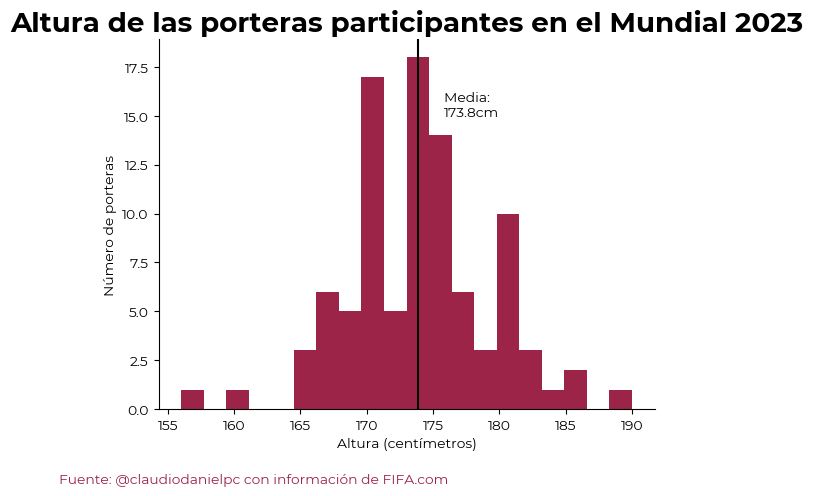

In [42]:
#Hacer histograma de votos de morena
plt.rcParams["font.family"]="Montserrat"

plt.hist(porteras["altura"], bins=20,color="#9d2449")
plt.title("Altura de las porteras participantes en el Mundial 2023", fontsize=20, fontweight="bold")
plt.xlabel("Altura (centímetros)")
plt.ylabel("Número de porteras")
"Añadir media y mediana"
plt.axvline(porteras["altura"].mean(), color="black", label="Media")

#Añadir texto con la media y mediana
plt.text(porteras["altura"].mean()+2, 15, "Media: \n"+str(round(porteras["altura"].mean(),1))+"cm", color="black")
#Eliminar bordes del gráfico
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

#Añadir texto con fecha y hora de corte de información
#Añadir fuente
plt.text(-0.2, -0.2, "Fuente: @claudiodanielpc con información de FIFA.com", fontsize=10, color="#9d2449", transform=plt.gca().transAxes)
#Salvar gráfico
#plt.savefig("morena_tmps.png", bbox_inches="tight", dpi=300)